C:\Users\Mrunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


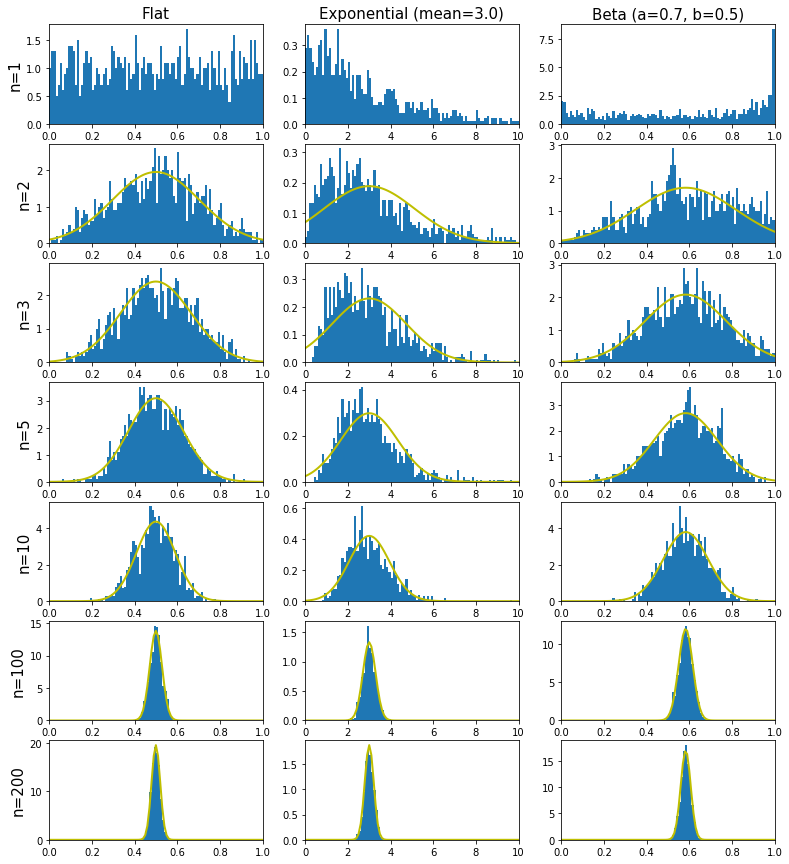

In [1]:
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 1000 # number of times n samples are taken. Try varying this number.
nobb = 101 # number of bin boundaries on plots
n = np.array([1,2,3,5,10,100,200]) # number of samples to average over

exp_mean = 3 # mean of exponential distribution
a,b = 0.7,0.5 # parameters of beta distribution

dist = [partial(np.random.random),partial(np.random.exponential,exp_mean),partial(np.random.beta,a,b)]
title_names = ["Flat", "Exponential (mean=%.1f)" % exp_mean, "Beta (a=%.1f, b=%.1f)" % (a,b)]
drange = np.array([[0,1],[0,10],[0,1]]) # ranges of distributions
means = np.array([0.5,exp_mean,a/(a+b)]) # means of distributions
var = np.array([1/12,exp_mean**2,a*b/((a+b+1)*(a+b)**2)]) # variances of distributions

binrange = np.array([np.linspace(p,q,nobb) for p,q in drange])
ln,ld = len(n),len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))

for i in range(ln): # loop over the number of n samples to average over
    for j in range(ld): # loop over the different distributions
        plt.subplot(ln,ld,i*ld+1+j)
        plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j],normed=True)
        plt.xlim(drange[j])
        if j==0:
            plt.ylabel('n=%i' % n[i],fontsize=15)        
        if i==0:
            plt.title(title_names[j], fontsize=15)
        else:
            clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
            plt.plot(binrange[j],clt,'y',linewidth=2)     
plt.show()

In [2]:
# as the sample size increases, better normal distribution occurs

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import math

In [4]:
df = pd.read_csv('Housing.csv')

In [5]:
df.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
sample_size = 100

In [7]:
z_critical = stats.norm.ppf(q=0.95)
print(z_critical)

1.6448536269514722


In [8]:
df_sample = df.sample(n=sample_size, random_state=0)
df_sample.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
2216,2217,909279080,50,RL,NaN,11275,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,220000
836,837,907126050,20,RL,65.0,9757,Pave,NaN,Reg,Low,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143000
2396,2397,528144030,60,RL,86.0,11065,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,281000
1962,1963,535452060,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,...,0,NaN,MnWw,NaN,0,4,2007,WD,Family,135000
305,306,911202100,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,102776


In [9]:
sample_mean = df_sample.SalePrice.mean()

In [10]:
population_std = df.SalePrice.std()

In [11]:
margin_of_error = z_critical*(population_std/math.sqrt(sample_size))

In [12]:
confidence_interval = (sample_mean-margin_of_error,sample_mean+margin_of_error)

In [13]:
true_mean = sum(df.SalePrice)/df.shape[0]
print(true_mean)

180796.0600682594


In [15]:
from statsmodels.stats.weightstats import ztest
import numpy as np
import pandas as pd

In [17]:
#Applying Z Test on data
z_statistic, p_value = ztest(df['Lot.Area'],value=1200,alternative='smaller')

In [18]:
print("Z score:",z_statistic)
print("p_value:",p_value)

Z score: 61.46512878748129
p_value: 1.0


In [19]:
if (p_value>0.05):
    inference = 'Accept Null Hypothesis'
else:
    inference = 'Accept Alternate Hypothesis'

print(inference)

Accept Null Hypothesis


In [21]:
#Applying t test
import scipy
# subset the dataframe
family = df[df['Sale.Condition'] == 'Family']['SalePrice']
alloca = df[df['Sale.Condition'] == 'Alloca']['SalePrice']

# conduct two sample t-test
t_stat, p_value = scipy.stats.mstats.ttest_ind(family,alloca)

# print the results
print('t-statistic = ',t_stat)
print('p-value = ',p_value)
if p_value>0.05:
    inference = 'Accept'
else:
    inference = 'Reject'

print(inference)

t-statistic =  -0.2600957325150498
p-value =  0.7955758684627952
Accept


In [22]:
#Chi squared test of independence

import scipy.stats as stats

# categorize the SalePrice into three buckets
price = pd.qcut(df['SalePrice'], 3, labels = ['High', 'Medium', 'Low'])

# make a frequency table with Land.Conotur
observed = pd.crosstab(df['Land.Contour'],price)

print(observed)

# conduct the chi-square test with the above frequency table
chi2, p, dof, ex = stats.chi2_contingency(observed)

print("Chi-square statistic = ",chi2)
print("p-value = ",p)

SalePrice     High  Medium  Low
Land.Contour                   
Bnk             61      34   22
HLS             21      23   76
Low             15      18   27
Lvl            884     905  844
Chi-square statistic =  75.32261796033875
p-value =  3.2939340603521704e-14
